# Module 4 Project: Predicting Wine Ratings Using Linear Regression
## Trey Younce & Stuart Murphy

### Goals:
Wine is an intriguing topic, especially when it come to quality. This is because wine is ultimately subject to taste preference. With that said, the wine rating system is important, because it provides a level objectivity when it comes to quality - something that gives consumers confidence when they enter a store. As a wine producer, it is important to obtain a high rating, as it will directly lead to more sales. Most consumers are more likely to buy a wine that has a higher rating.
The goal of the project is to help wine producers understand what factors correlate to a high rating. We want to be able to help wine producers understand where they shoulkd be focusing their resources and pootential future investments.

### Data Source:
[Wine Enthusiast](https://www.winemag.com/ratings/) is a highly reputable wine publication that provides reatings and reviews on wines. We were able to scrape their website for wine reviews.

In [374]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display_html
import os
import sys

sys.path.append(os.getcwd() + '/modules')
import functions

%matplotlib inline
from functions import *

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [34]:
data = pd.DataFrame(clean_df).groupby('variety').filter(lambda x: len(x) >= 50)


# Analysis

Our final clean dataset contains 2 continuous variables (price & points), while all other variables are categorical in nature. With 105076 unique, clean, and complete observations, we can now begin our analysis.

In [ ]:
data.shape

In [358]:
data.columns

Index(['country', 'points', 'price', 'province', 'variety'], dtype='object')

In [375]:
data.shape

(105076, 5)

The first thing we need to do is to identify out target variable (y).

In [360]:
y = data['points']


## Dealing with categorical variables:
In order to analyze our data effectively we must somehow convert our catergorical variable into Our initial approach was to split the data and then one hot encode out the categorical variables. However, our resluts proved prohibitive, as the resulting training and test dataframes were separate widths (even after setting handle unkowns to 'ignore'), which made it impossible to analyze. An example of our split and one hot encoding is below:

In [ ]:
# def prep_data_country(X, X_test, y_train, y_test):
#     X = X.drop(['province', 'variety', 'price', 'points'], axis = 1)
#     X_test = X_test.drop(['province', 'variety', 'price', 'points'], axis = 1)
#     y1_train = y_train.astype(float)
#     y1_test = y_test.astype(float)
#     categorical_variables = X.select_dtypes(include=['object']).columns
#     numerical_variables = X.select_dtypes(include = ['int64', 'float64']).columns
#     X_test_cat_var = X_test.select_dtypes(include=['object']).columns
#     X_test_num_var = X_test.select_dtypes(include = ['int64', 'float64']).columns
#     ohe = OneHotEncoder(handle_unknown='ignore')
#     X_categ = ohe.fit_transform(X[categorical_variables]).toarray()
#     X_num = X[numerical_variables].values
#     X1 = np.concatenate((X_categ, X_num), axis=1)
#     X_test_categ = ohe.transform(X_test[X_test_cat_var]).toarray()
#     X_test_num = X_test[X_test_num_var].values
#     X1_test = np.concatenate((X_test_categ, X_test_num), axis=1)
#     return X1, X1_test, y1_train, y1_test

With such prevention in place, our 'plan B' was to create new dataframes of the variabkes we want to investigate & predict against and use 'get dummies' to transform our categorical variables to numerical.

In [361]:
price = pd.DataFrame(data['price'])

countries = pd.DataFrame(data['country'])
countries = pd.get_dummies(countries.country)

varieties = pd.DataFrame(data['variety'])
varieties = pd.get_dummies(varieties.variety)

province = pd.DataFrame(data['province'])
province = pd.get_dummies(province.province)


countries_price = [countries, price]
countries_price = pd.concat(countries_price, axis=1)

varieties_price = [varieties, price]
varieties_price = pd.concat(varieties_price, axis=1)

province_price = [province, price]
province_price = pd.concat(province_price, axis=1)



countries_variety = [countries, varieties]
countries_variety = pd.concat(countries_variety, axis=1)

province_variety = [province, varieties]
province_variety = pd.concat(province_variety, axis=1)



countries_variety_price = [countries, varieties, price]
countries_variety_price = pd.concat(countries_variety_price, axis=1)

province_variety_price = [province, varieties, price]
province_variety_price = pd.concat(province_variety_price, axis=1)

Below we are just making sure we have the correct shaped dataframes that will allow us to make predictions more effectively

In [362]:
countries.shape

(105076, 41)

In [363]:
province_price.shape

(105076, 385)

In [364]:
province_variety_price.shape

(105076, 504)

The next step in our project was to split our datasets, train our algorithm and make predictions.
A note on Algorithm selection: We decided to use a 'ridge' linear regression. The reason for this is that our dependent variable is continuous and so we wanted to be able to predict along this continuum (something that logistic regression fails to achieve). Secondly, 'ridge' penalizes coeffient variables but will never reduce their valiues to zero. As our dataset contains very few columns, we do not want to reduce any of our variables to zero. Similarly, we decided not to standardize any of our coefficient variables, because we are really only using one or two independent variables at a time in our prediction, and so standardization doesn't make any relevant different in our model.

In [356]:
def prep_and_pred(data, y):
    X, X_test, y_train, y_test = train_test_split(data, y, test_size= 0.20, random_state=42)
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)
    model = linear_model.Ridge(alpha = 0.1).fit(X, y_train)
    predictions = model.predict(X_test)
    # The mean squared error
    print("--Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
    # Explained variance score: 1 is perfect prediction
    print('--Variance score: %.2f' % r2_score(y_test, predictions))
    true_vs_pred = np.vstack((predictions, y_test))
    true_df = pd.DataFrame(true_vs_pred)
    true_df = true_df.transpose()
    true_df.columns = ["Predicted", "Actual"]
    return true_df

In [323]:
countries_pred = prep_and_pred(countries, y)

--Mean squared error: 8.98
--Variance score: 0.05


In [324]:
countries_pred.head()

,Predicted,Actual
0,88.640679,92.0
1,88.557062,88.0
2,88.640679,84.0
3,87.270881,84.0
4,87.856816,86.0


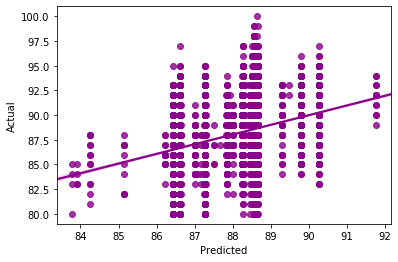

In [325]:
sns.regplot(x='Predicted', y='Actual', data=countries_pred, color='darkmagenta')

In [326]:
varieties_pred = prep_and_pred(varieties, y)

--Mean squared error: 8.69
--Variance score: 0.08


In [327]:
varieties_pred.head()

,Predicted,Actual
0,88.153586,92.0
1,88.570225,88.0
2,88.663147,84.0
3,87.391093,84.0
4,88.322914,86.0


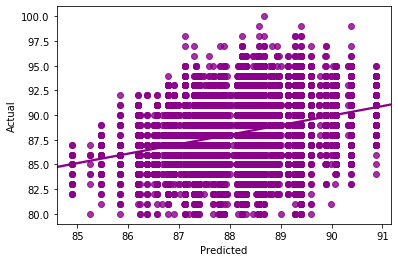

In [328]:
sns.regplot(x='Predicted', y='Actual', data=varieties_pred, color='darkmagenta')

In [329]:
province_pred = prep_and_pred(province, y)

--Mean squared error: 8.42
--Variance score: 0.11


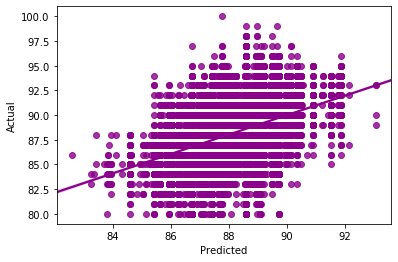

In [331]:
sns.regplot(x='Predicted', y='Actual', data=province_pred, color='darkmagenta')

In [377]:
price_pred = prep_and_pred(price, y)

--Mean squared error: 6.66
--Variance score: 0.30


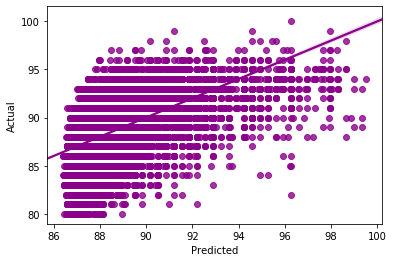

In [378]:
sns.regplot(x='Predicted', y='Actual', data=price_pred, color='darkmagenta')

In [332]:
countries_price_pred = prep_and_pred(countries_price, y)

--Mean squared error: 6.39
--Variance score: 0.33


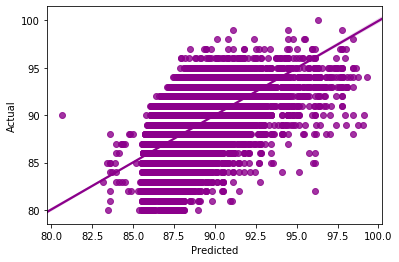

In [333]:
sns.regplot(x='Predicted', y='Actual', data=countries_price_pred, color='darkmagenta')

In [334]:
varieties_price_pred = prep_and_pred(varieties_price, y)

--Mean squared error: 6.30
--Variance score: 0.34


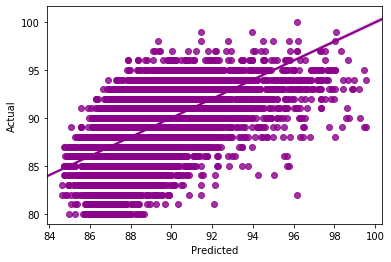

In [336]:
sns.regplot(x='Predicted', y='Actual', data=varieties_price_pred, color='darkmagenta')

In [337]:
province_price_pred = prep_and_pred(province_price, y)

--Mean squared error: 6.15
--Variance score: 0.35


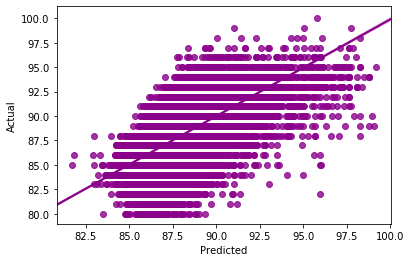

In [339]:
sns.regplot(x='Predicted', y='Actual', data=province_price_pred, color='darkmagenta')

In [365]:
countries_variety_pred = prep_and_pred(countries_variety, y)

--Mean squared error: 8.34
--Variance score: 0.12


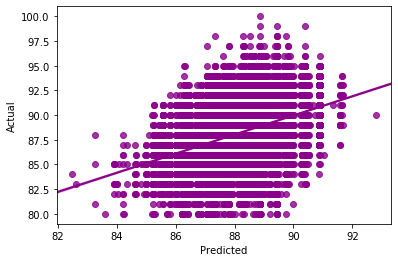

In [367]:
sns.regplot(x='Predicted', y='Actual', data=countries_variety_pred, color='darkmagenta')

In [368]:
province_variety_pred = prep_and_pred(province_variety, y)

--Mean squared error: 7.94
--Variance score: 0.16


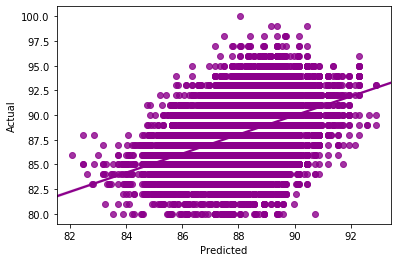

In [370]:
sns.regplot(x='Predicted', y='Actual', data=province_variety_pred, color='darkmagenta')

In [380]:
countries_variety_price_pred = prep_and_pred(countries_variety_price, y)

--Mean squared error: 6.18
--Variance score: 0.35


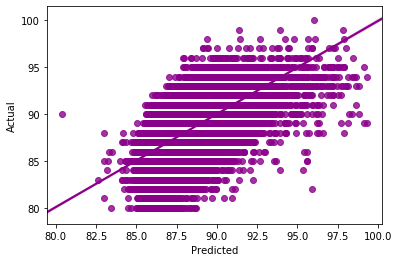

In [381]:
sns.regplot(x='Predicted', y='Actual', data=countries_variety_price_pred, color='darkmagenta')

In [382]:
province_variety_price_pred = prep_and_pred(province_variety_price, y)

--Mean squared error: 5.99
--Variance score: 0.37


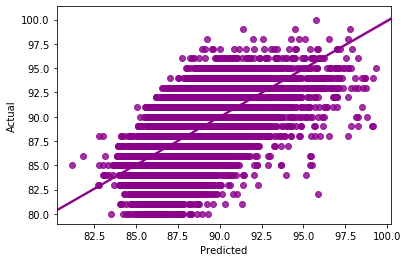

In [383]:
sns.regplot(x='Predicted', y='Actual', data=province_variety_price_pred, color='darkmagenta')

# Conclusions


All in all, not fantastic results. Looking at the metrics, it would seem that any one of models is really only able to explain between 5% and 37% of the variance in our data. 

Digging a little deeper into our findings, I think one of the more interesting observations from the results here is that of price seems to play a slightly more important role when predicting points. Any prediction that didn't involve price produced an R2 score between 0.05 and 0.16. When price is icluded in the prediction, these scores more than doubled. The strongest predictions we were able to make was when we used province and price (RMSE = 6.15, R2 = 0.35) and province, price, variety (RMSE = 5.99, R2 = 0.37) were used. This also tends to indicate that there is some strong collinearity between province and variety (which makes sense, as a lot of provinces - especially in Europe - highly regulate what varieties can be grown in what provinces).

So, as a final conclusion, we can say that it is hard to predict a wine's rating using a linear regression model. No single variable or combination of variables was accurate enough to produce a model that we could put a lot of confidence in. With that said, our data does show that a wine's price have more power as a predictor of rating than any other variable. Now, this begs to ask the question as to whether expensive wines are expensive, because they have a higher rating? This is hard to determine, because there are a number of examples of highly rated wines in our dataset that are not expensive. More investigation here is required.

# Future Work

After viewing our results, it made us want to investgate further. We think the linear model was probbaly not the best for this project. This is mainly because, although Wine Enthusiast's Wine Ratings exist on a 70 - 100 scale, the truth is that most wines fall on a scale between 85 - 95 points, meaning our continuos variable acts more like a categorical varible in nature. We would like to run the analysis again using some form of supervised learning - perhhaps a random forest.

Secondly, due to time contraints, we were not able to capture and analysis other variabvles that could be helpful in determining rating. In a future model, we would like to incorporate variables such as a wine's description and vintage.
